# Hand written digit classification

In [2]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn import metrics
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
mnist=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

In [44]:
y=mnist['label'] # label
x=mnist.drop(['label'],axis=1)
#y=f(x)

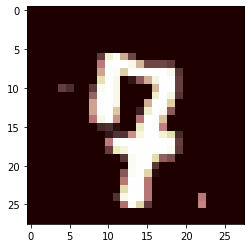

7

In [53]:
%matplotlib inline
digit=np.array(x.iloc[76])
digit_img=digit.reshape(28,28)
plt.imshow(digit_img,cmap='pink')
plt.show()

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [60]:
clf=KNeighborsClassifier()
clf.fit(x_train,y_train)
prediction=clf.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(metrics.confusion_matrix(y_test,prediction),columns=[0,1,2,3,4,5,6,7,8,9],index=[0,1,2,3,4,5,6,7,8,9])

,0,1,2,3,4,5,6,7,8,9
0,1022,0,0,0,0,0,3,0,0,0
1,0,1143,0,0,0,0,3,0,0,0
2,9,17,1014,3,2,2,2,22,1,0
3,2,5,4,1110,0,10,2,6,5,7
4,2,7,0,0,993,0,3,1,0,18
5,2,2,0,19,1,861,9,0,1,3
6,8,2,0,0,0,2,997,0,1,0
7,0,26,2,0,2,0,0,1088,0,17
8,1,14,2,18,3,18,4,1,936,8
9,6,3,1,12,10,0,0,14,2,986


In [64]:
result=clf.predict(test_data)

(28000,)

In [68]:
id=np.arange(1,28001)
output = pd.DataFrame({
    'ImageId':id,
    'Label':result
})
output.to_csv('csv_to_submit.csv', index = False)